# Project: Exploratory Data Analysis - Terrorism

## Introduction:

    Terrorism, a complex and pervasive global challenge, demands a comprehensive examination to unravel patterns, trends,
    and underlying dynamics. This Exploratory Data Analysis (EDA) extends beyond the global perspective to focus on two
    distinct countries—Iraq and India. By synthesizing insights from the overall dataset and incorporating the additional
    depth of the two-country analysis, this EDA aims to contribute a nuanced understanding of the multifaceted nature of
    terrorism on a global scale.


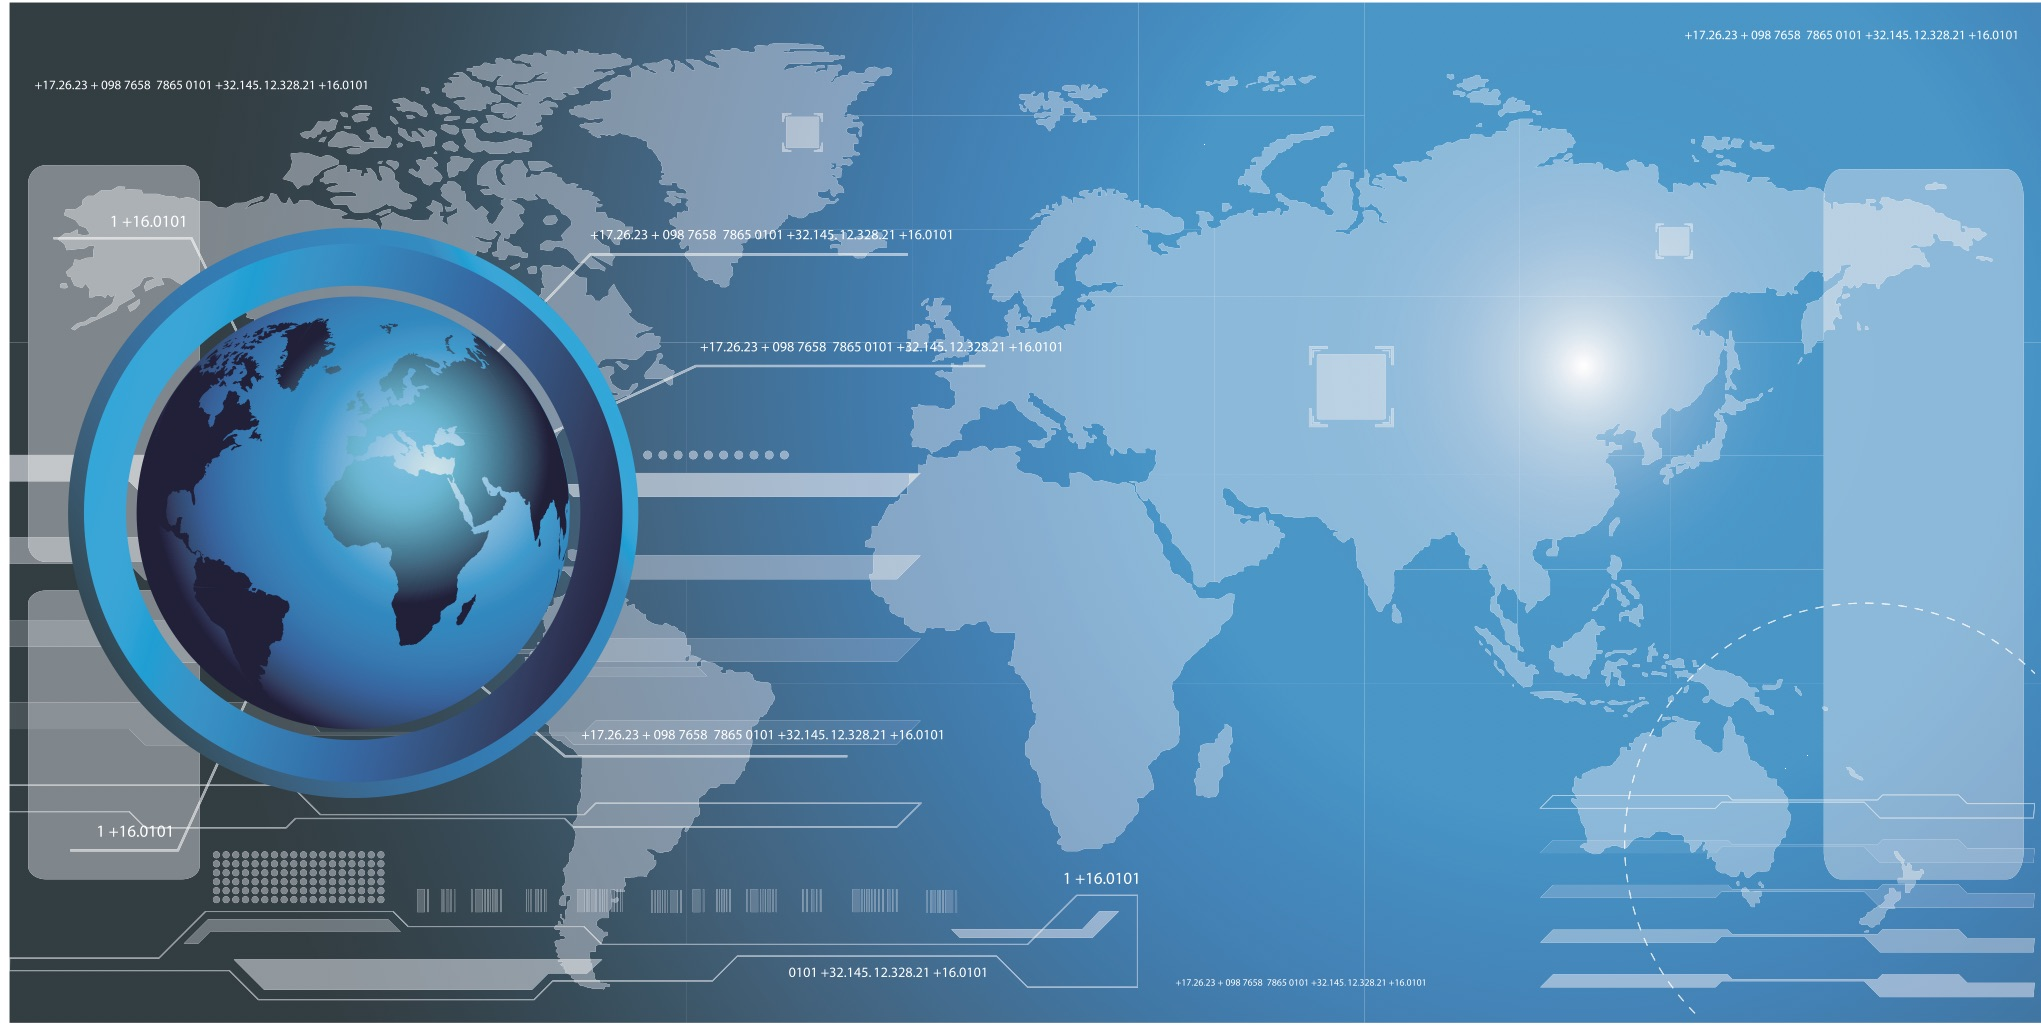

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the Data
data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
data

# Data Cleaning

In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
data.head(pd.set_option('display.max_columns',None))

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
data.shape

(181691, 135)

In [ ]:
for column in data.columns:
    missing_values = data[column].isnull().sum()
    total_values = len(data)
    percentage_missing = (missing_values / total_values) * 100
    print(f"Column '{column}' has {missing_values} missing values, which is {percentage_missing:.2f}% of the total.")


Column 'eventid' has 0 missing values, which is 0.00% of the total.
Column 'iyear' has 0 missing values, which is 0.00% of the total.
Column 'imonth' has 0 missing values, which is 0.00% of the total.
Column 'iday' has 0 missing values, which is 0.00% of the total.
Column 'approxdate' has 172452 missing values, which is 94.91% of the total.
Column 'extended' has 0 missing values, which is 0.00% of the total.
Column 'resolution' has 179471 missing values, which is 98.78% of the total.
Column 'country' has 0 missing values, which is 0.00% of the total.
Column 'country_txt' has 0 missing values, which is 0.00% of the total.
Column 'region' has 0 missing values, which is 0.00% of the total.
Column 'region_txt' has 0 missing values, which is 0.00% of the total.
Column 'provstate' has 421 missing values, which is 0.23% of the total.
Column 'city' has 434 missing values, which is 0.24% of the total.
Column 'latitude' has 4556 missing values, which is 2.51% of the total.
Column 'longitude' has

# Insights
In Our data missing values 86.22% so we could use important columns for our analysics

In [ ]:
# Rename columns
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
data = data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
data

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


# Basic Checks

In [ ]:
data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [ ]:
data.describe(include="all")

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
count,181691.000000,181691.000000,181691.000000,181691,181270,181691,181257,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,181055,115562,181691,181691,181691,50561
unique,NaN,NaN,NaN,205,2855,12,36674,NaN,NaN,9,NaN,NaN,86006,112492,3537,22,12,14490
top,NaN,NaN,NaN,Iraq,Baghdad,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,Civilians,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown
freq,NaN,NaN,NaN,24636,7645,50474,9775,NaN,NaN,88255,NaN,NaN,6461,100,82782,43511,92426,14889
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,2.403272,3.167668,NaN,NaN,NaN,NaN,NaN,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,11.545741,35.949392,NaN,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [ ]:
data.nunique()

Year               47
Month              13
Day                32
Country           205
state            2855
Region             12
city            36674
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
dtype: int64

# Explotary  Data Analysis

In [ ]:
# Define a set of distinct and vibrant colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

## Attack through the Year from 1970 - 2017

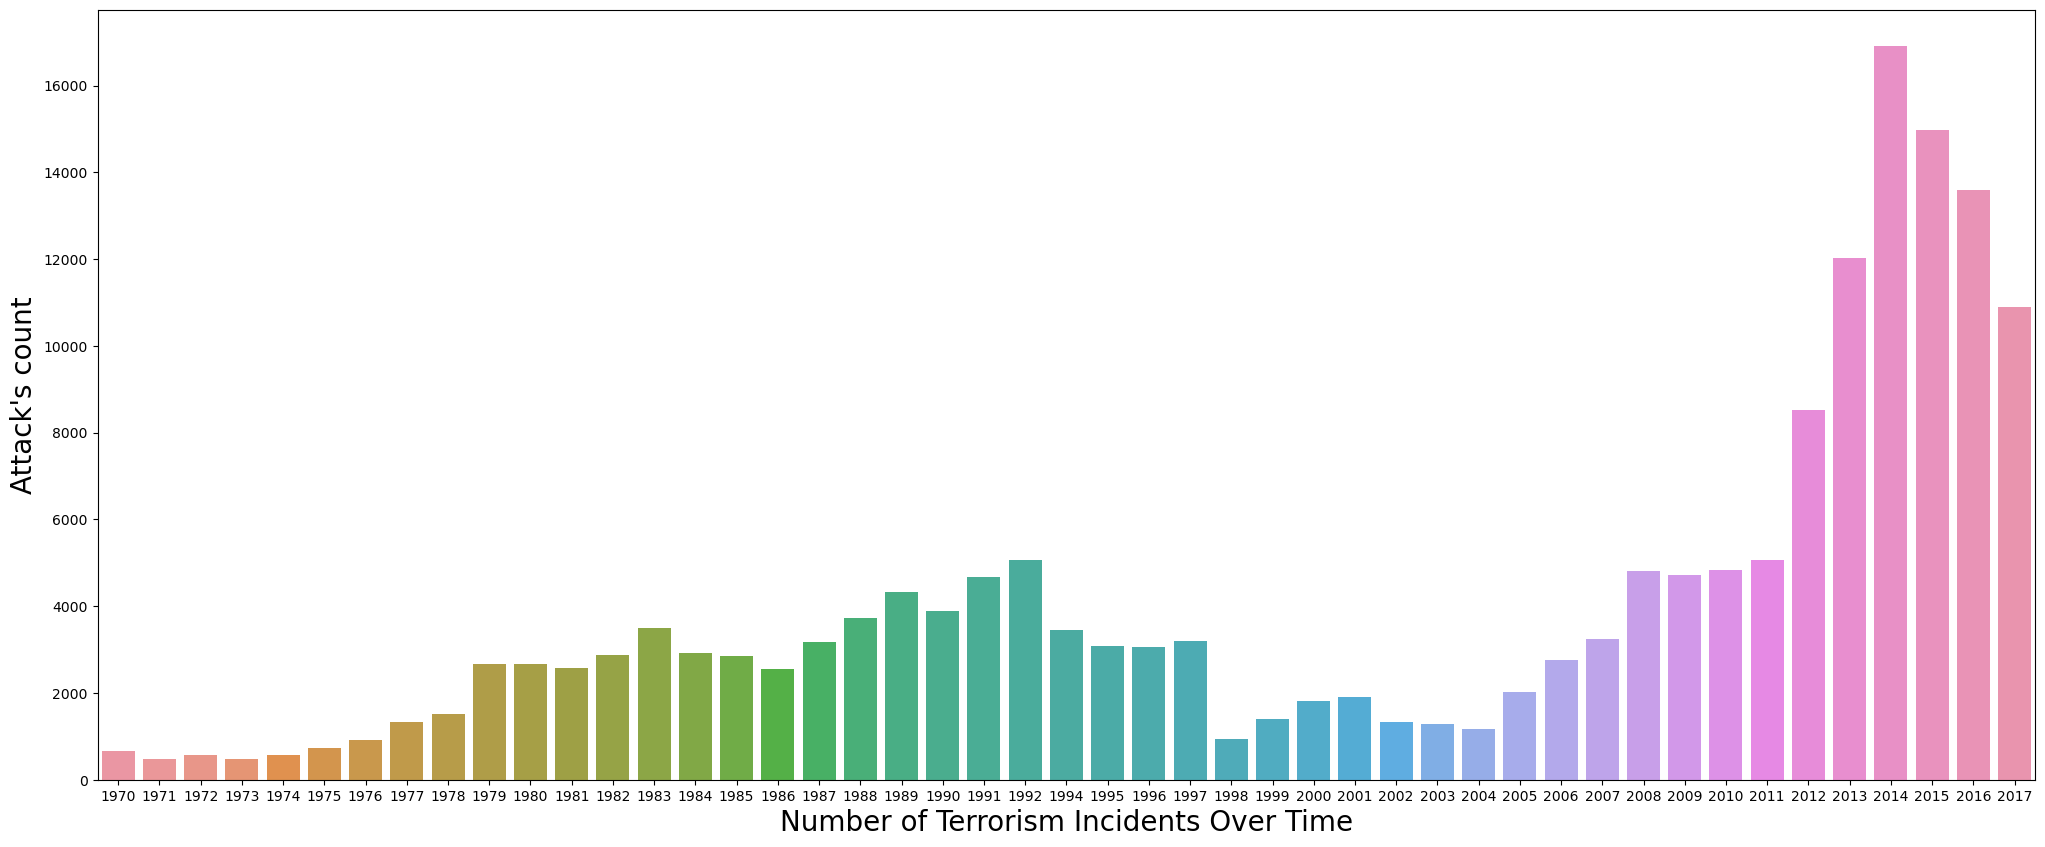

In [ ]:
year1= data['Year'].unique()
year2=data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize=(25,10))
sns.barplot(x=year1,y=year2)
plt.xlabel('Number of Terrorism Incidents Over Time',fontsize=20)
plt.ylabel("Attack's count",fontsize=20)
plt.show()

### Insights

#### Peak Activity in 2014 and 2015:

   **Insight:**
       
    The years 2014 and 2015 experienced a significant surge in terrorist activities.
   **Potential Explanations:**
   
    Investigate geopolitical events, conflicts, or social factors that may have contributed to the heightened level of
    terrorism during these years.
#### Notable Incidents in 2013 and 2016:

**Insight:**
   
    While 2014 and 2015 were peak years, there were also notable incidents in 2013 and 2016.
**Potential Explanations:**

    Explore whether specific events or circumstances, distinct from those in 2014 and 2015, played a role in the
    occurrences during 2013 and 2016.

## Distribution of Terrorism Incidents by Region

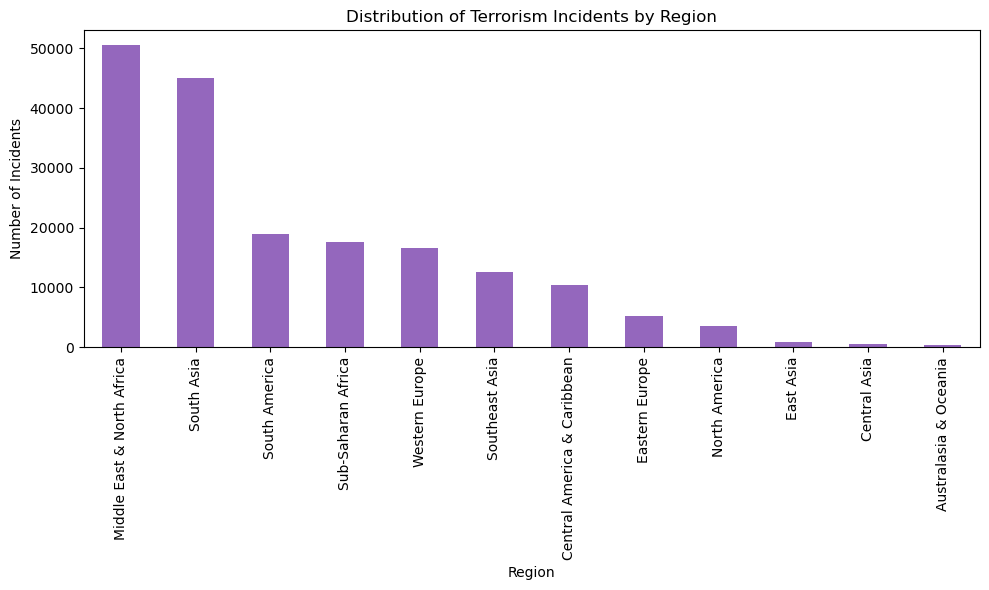

In [ ]:
# Region Analysis - Bar Plot
plt.figure(figsize=(10, 6))

data['Region'].value_counts().plot(kind='bar', color=colors[4])
plt.title('Distribution of Terrorism Incidents by Region')
plt.xlabel('Region')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()


### Insights

#### Middle East & North Africa Dominance:

**Insight:**

    The Middle East & North Africa region has the highest number of recorded terrorist attacks, with 50,474 incidents.
**Significance:**

    This suggests a concentration of terrorist activities in the Middle East & North Africa, emphasizing the region's
    vulnerability to such incidents.

#### Significant Activity in South Asia:

**Insight:**

    South Asia follows closely with 44,974 recorded terrorist attacks.
**Implications:**

    The substantial number of incidents in South Asia highlights the region's susceptibility to terrorism and the need
    for targeted security measures.

#### Notable Incidents in South America:

**Insight:**

    South America has experienced 18,978 terrorist attacks.
**Consideration:**

    While lower compared to the Middle East and South Asia, the significant number in South America merits attention and
    further investigation into the nature of these incidents.

#### Sub-Saharan Africa's Terrorism Challenge:

**Insight:**

    Sub-Saharan Africa has faced 17,550 recorded terrorist attacks.
**Concerns:**

    The region's high number of incidents underscores the ongoing challenges related to terrorism in Sub-Saharan Africa.

#### Western Europe's Exposure:

**Insight:**

    Western Europe, although geographically smaller, has recorded 16,639 terrorist attacks.
**Implications:**

    The presence of terrorism in Western Europe highlights the global spread of this phenomenon, necessitating international
    cooperation in addressing security concerns.

# Top 25 Countries - Distribution of Attacks

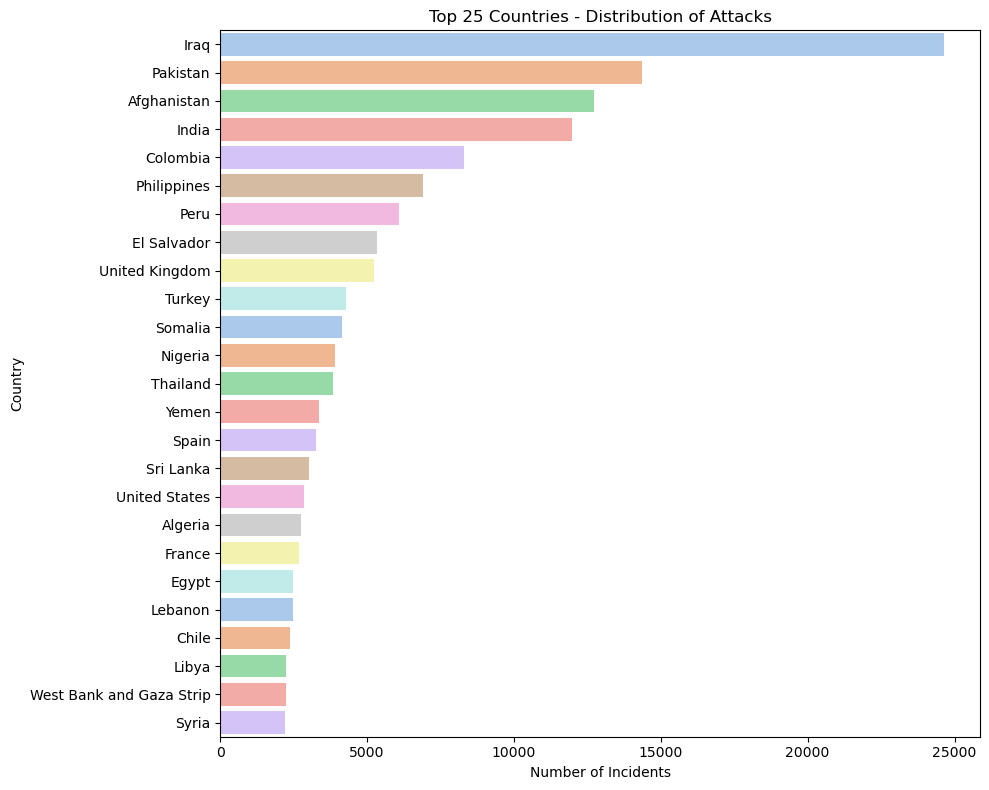

In [ ]:
plt.figure(figsize=(10, 8))
data_no_missing_country = data.dropna(subset=['Country'])
Country_counts = data_no_missing_country['Country'].value_counts()
colors = sns.color_palette('pastel', len(Country_counts))
top_countries = Country_counts.head(25)
sns.barplot(y=top_countries.index, x=top_countries.values, palette=colors)
plt.xlabel('Number of Incidents')
plt.ylabel('Country')
plt.title('Top 25 Countries - Distribution of Attacks')
plt.tight_layout()
plt.show()


### Insights

    The distribution of terrorist attacks highlights Iraq's substantial challenges (24,636 incidents), followed by
    significant impacts in Pakistan (14,368), persistent threats in Afghanistan (12,731), security challenges in
    India (11,960), and historical struggles in Colombia (8,306).

## Distribution of Attack Types

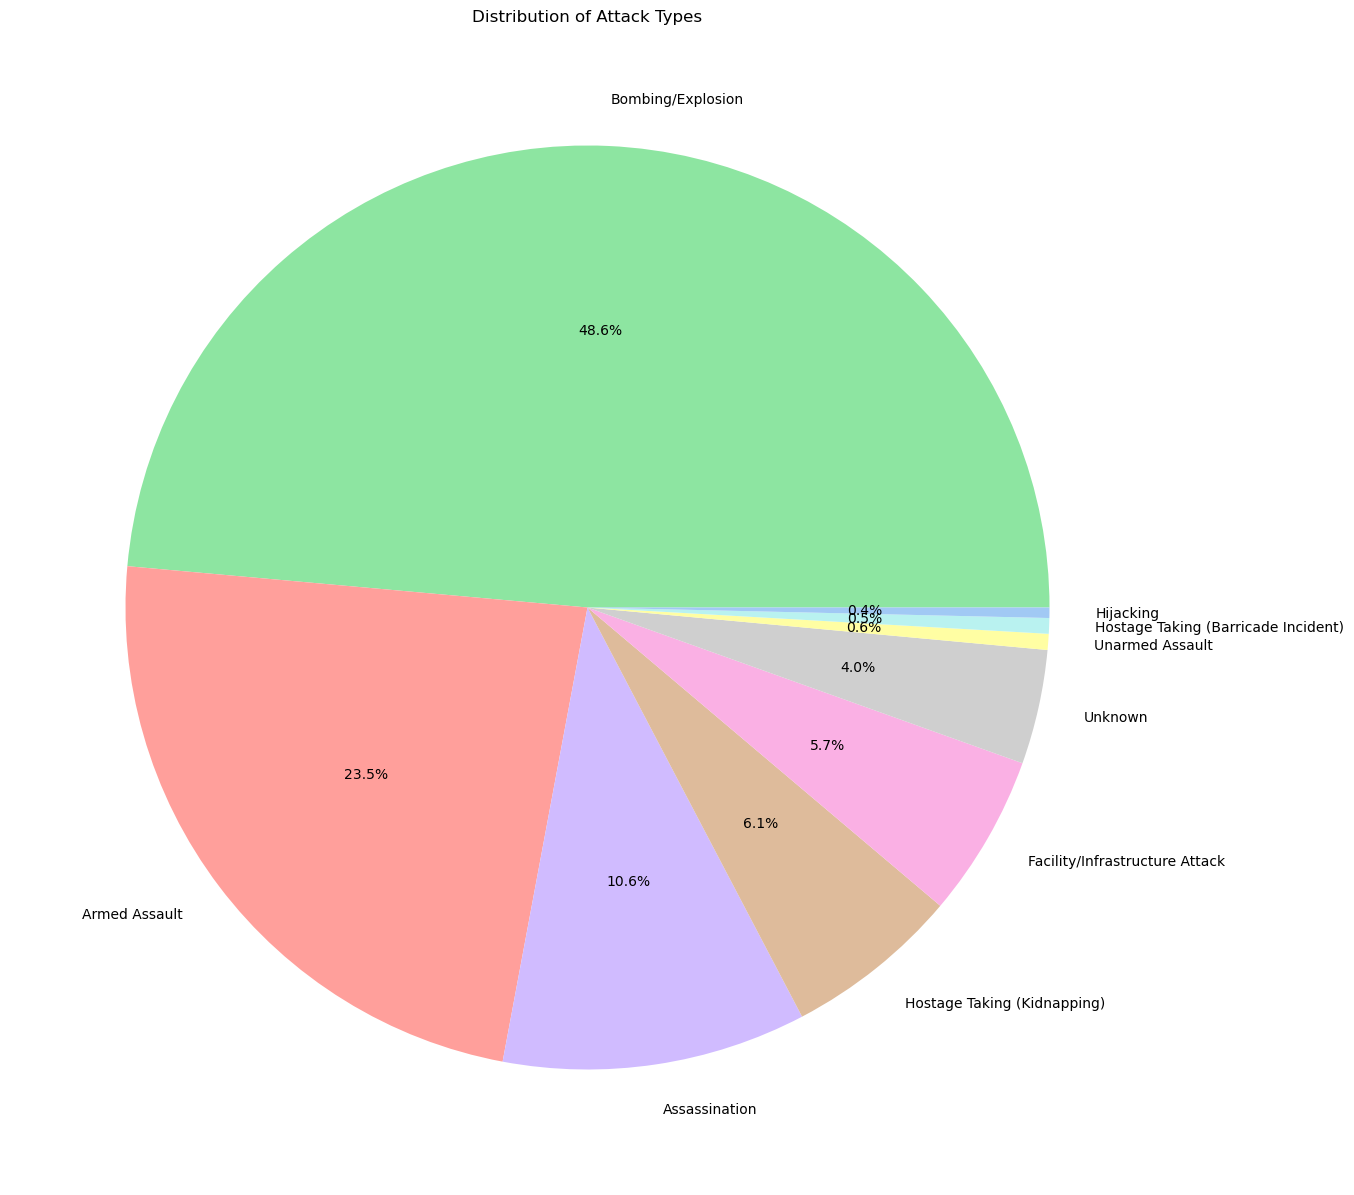

In [ ]:
# Attack Analysis - Pie Chart
plt.figure(figsize=(15, 15))
data['AttackType'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors[2:])
plt.title('Distribution of Attack Types')
plt.ylabel('')
plt.show()

### Insights

    The predominant methods of terrorist attacks include Bombing/Explosion (48%), Armed Assault (23%), Assassination (10%),
    Hostage Taking (Kidnapping) (6%), Facility/Infrastructure Attack (5%), with lesser occurrences in Unknown (4%),
    Unarmed Assault (0.6%), Hostage Taking (Barricade Incident) (0.5%), and Hijacking (0.4%).

# Distribution of Target Types

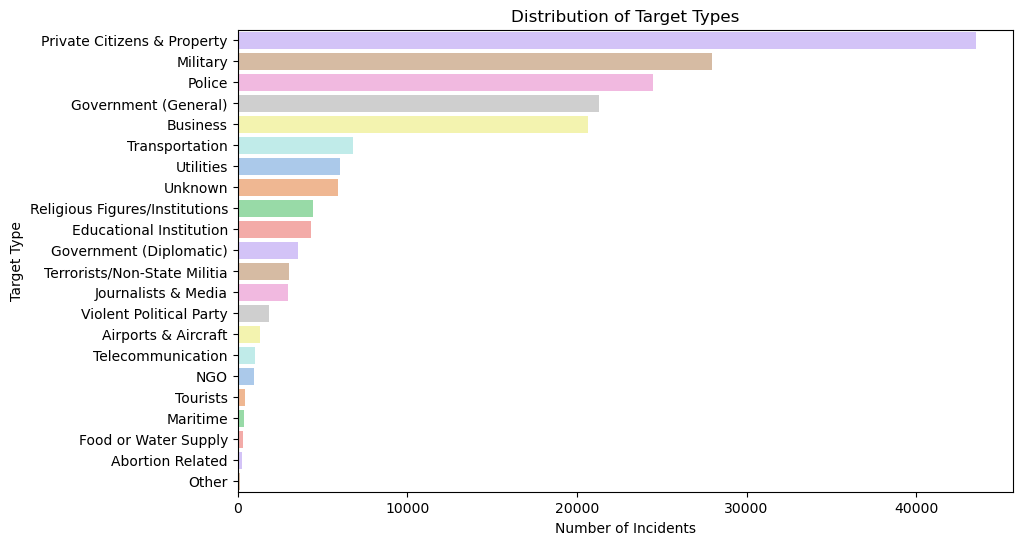

In [ ]:
# Target Analysis - Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Target_type'], order=data['Target_type'].value_counts().index, palette=colors[4:])
plt.title('Distribution of Target Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Target Type')
plt.show()

### Insights

    * Private Citizens & Property bear the brunt of terrorist attacks, accounting for the highest incidents (43,511),
      emphasizing the impact on civilian lives and personal assets.

    * Military (27,984) and Police (24,506) are significant targets, underlining the strategic focus on security forces
      and institutions by terrorist elements.

    * Government entities, including Government (General) (21,283) and Government (Diplomatic) (3,573), alongside Business
      (20,669), experience notable attack frequencies, highlighting the broader implications on political, economic, and
      diplomatic spheres.








# Top 10 Terrorist Groups

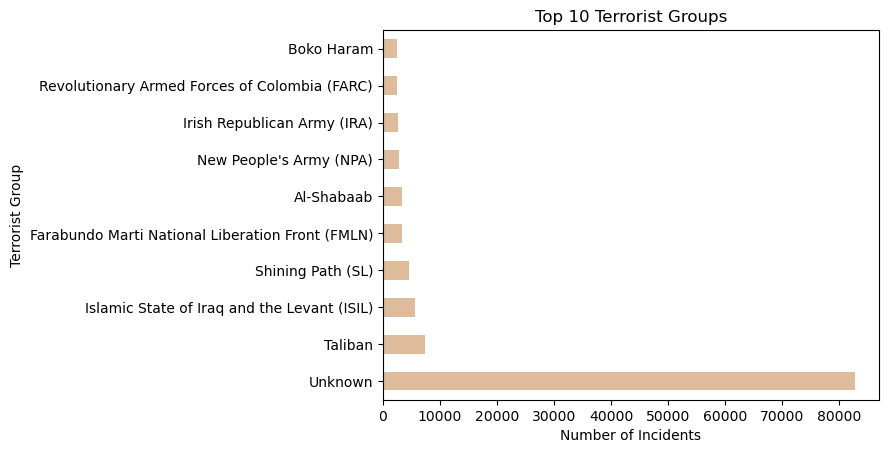

In [ ]:
# Group Analysis - Horizontal Bar Plot
data['Group'].value_counts().head(10).plot(kind='barh', color=colors[5])
plt.title('Top 10 Terrorist Groups')
plt.xlabel('Number of Incidents')
plt.ylabel('Terrorist Group')
plt.show()

### Insights

    * Unknown (82,782): The identity of the responsible group is unknown in a significant number of cases, highlighting
      challenges in attribution and investigation.

    * Taliban (7,478): The Taliban is a prominent group involved in a substantial number of recorded terrorist incidents,
      reflecting its historical and ongoing impact.

    * Islamic State of Iraq and the Levant (ISIL) (5,613): ISIL remains a notable force in global terrorism, with a
      substantial number of incidents attributed to the group.

# Top 10 Terrorist Groups and Top 10 Attacked Countries

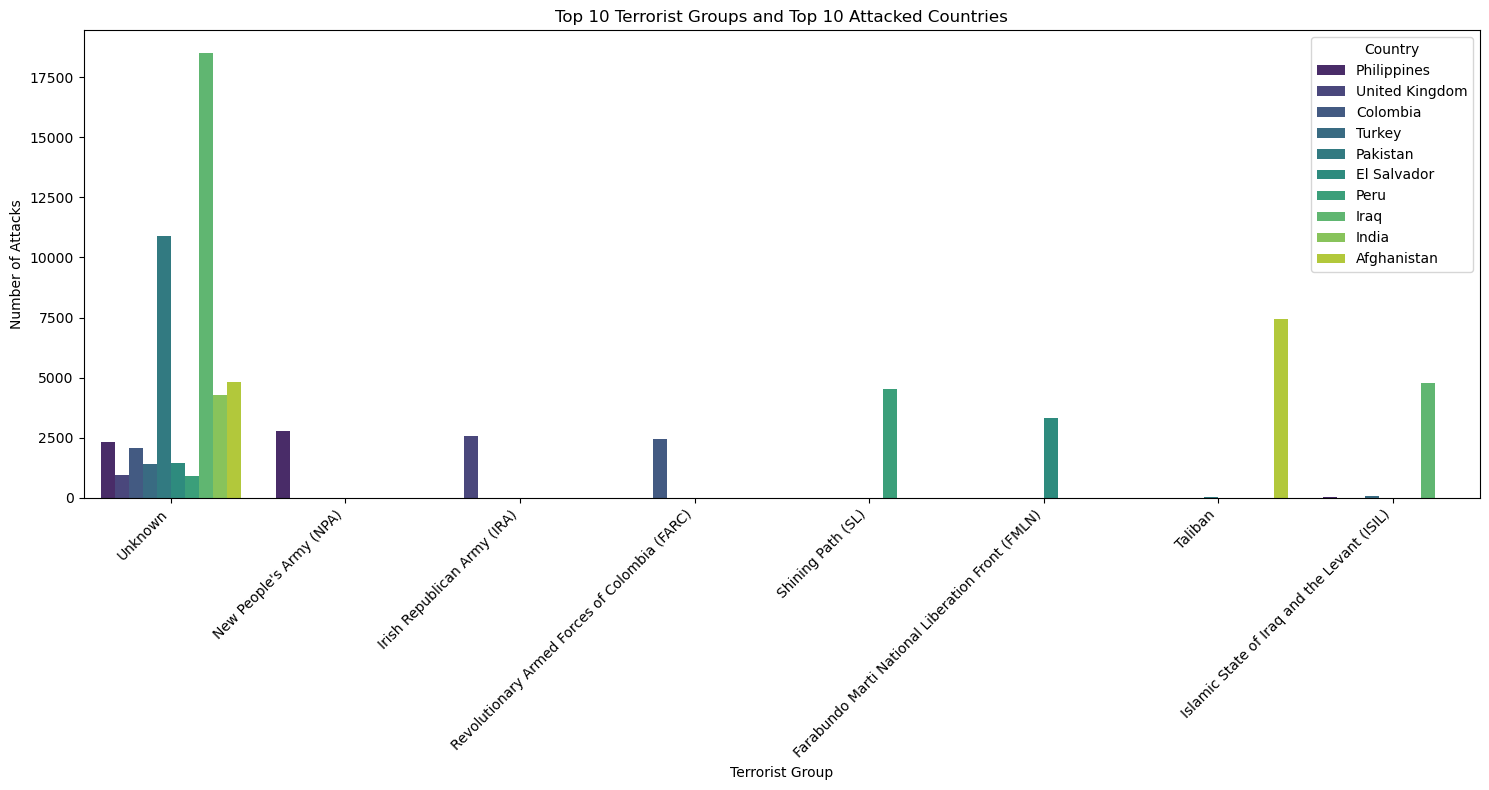

In [ ]:
top_groups = data['Group'].value_counts().head(10).index
top_countries = data['Country'].value_counts().head(10).index

filtered_data = data[data['Group'].isin(top_groups) & data['Country'].isin(top_countries)]

# Plotting a combined bar plot
plt.figure(figsize=(15, 8))
sns.countplot(x='Group', hue='Country', data=filtered_data, palette='viridis')

# Adding labels and title
plt.title('Top 10 Terrorist Groups and Top 10 Attacked Countries')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### Insights

#### Global Presence of Unknown Groups:

**Insight:**

    Unknown groups have carried out attacks across diverse regions, including the Philippines, UK, Colombia, Pakistan,
    Afghanistan, Turkey, Peru, Iraq, India, and El Salvador.
**Implications:**
     
    The widespread presence of unknown groups underscores challenges in identifying and addressing the root causes of
    terrorism on a global scale.
#### New People's Army in the Philippines:

**Insight:**

    The New People's Army has been active primarily in the Philippines.
**Significance:**

    Understanding the NPA's activities in the Philippines is crucial for targeted counter-terrorism efforts in the region.
#### Irish Republican Army in the UK:

**Insight:**

    The Irish Republican Army has a historical connection to terrorist activities in the UK.
**Consideration:**

    Historical context is essential in comprehending the IRA's impact on security dynamics in the UK.
#### Revolutionary Armed Forces of Colombia (FARC) in Colombia:

**Insight:**

    The Revolutionary Armed Forces of Colombia (FARC) has been a significant actor in Colombia.
**Implications:**

    Addressing the historical and present challenges posed by FARC is essential for Colombia's security and stability.
#### Shining Path in Sri Lanka:

**Insight:**

    Shining Path has been active, particularly in Sri Lanka.
**Consideration:**

    Focusing on Shining Path's activities in Sri Lanka provides insights into regional security challenges.
#### FMLN in El Salvador:

**Insight:**

    The Farabundo Marti National Liberation Front (FMLN) has been involved in terrorist activities in El Salvador.
**Consideration:**

    Understanding the role of FMLN in El Salvador is crucial for addressing local security concerns.

# Distribution of Weapon Types

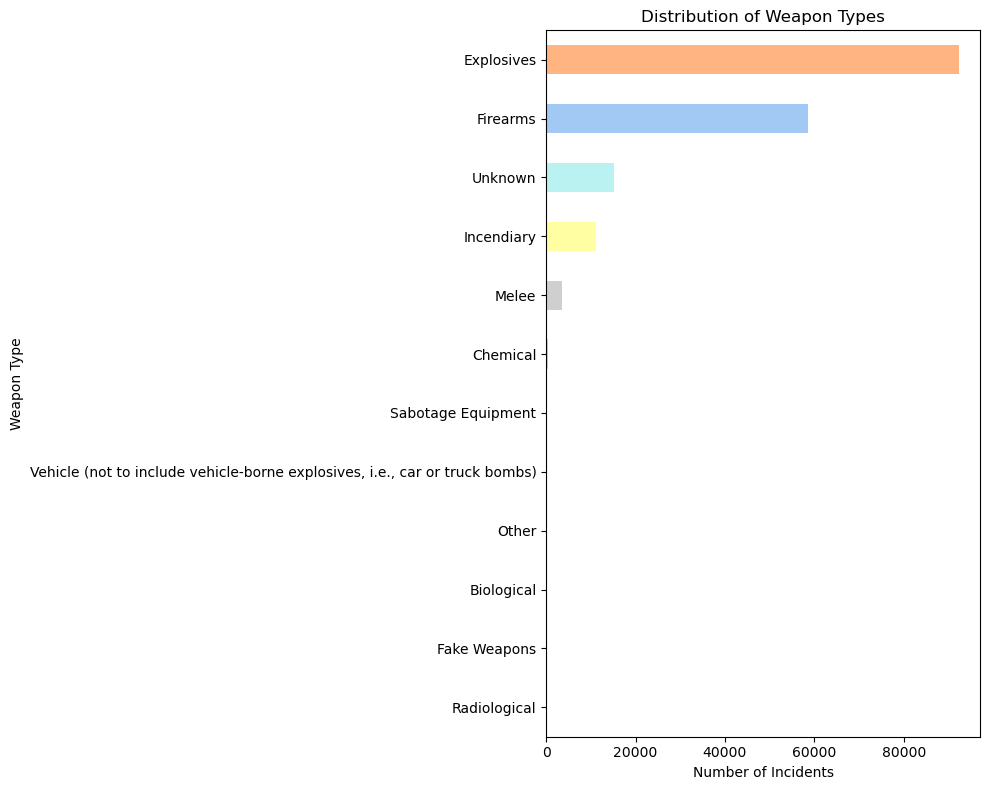

In [ ]:
# Weapon Analysis - Horizontal Bar Plot with Missing Values Dropped
plt.figure(figsize=(10, 8))
data_no_missing_weapon = data.dropna(subset=['Weapon_type'])
weapon_counts = data_no_missing_weapon['Weapon_type'].value_counts()
colors = sns.color_palette('pastel')[0:len(weapon_counts)]
weapon_counts.sort_values().plot(kind='barh', color=colors)
plt.xlabel('Number of Incidents')
plt.ylabel('Weapon Type')
plt.title('Distribution of Weapon Types')
plt.tight_layout()
plt.show()


### Insights

#### Prevalence of Explosives (92,426):

**Insight:**

    Explosives dominate as the primary weapon in terrorist attacks, emphasizing their high lethality and widespread use.
**Implication:**
    
    Counter-terrorism strategies should prioritize the detection and prevention of explosive-related activities.
#### Significant Use of Firearms (58,524):

**Insight:**
   
    Firearms play a substantial role in terrorist incidents, indicating the diverse methods employed by perpetrators.
**Consideration:**

    Addressing the illicit circulation of firearms is crucial for reducing the potential impact of armed attacks.
#### Challenges in Documenting Unknown Weapons (15,157):

**Insight:**  

    A considerable number of incidents involve unknown weapons, highlighting challenges in accurately documenting
    weapon types.
**Implication:**

    Improving data collection methods is essential for a more comprehensive understanding of the weapons landscape
    in terrorism.

# Word Cloud of Motives

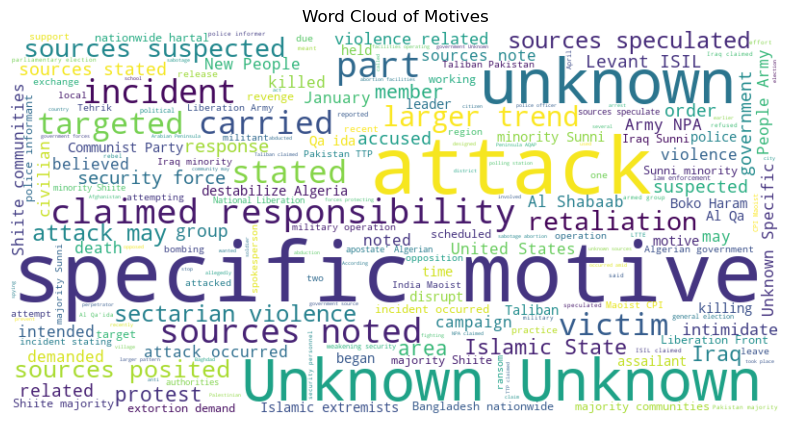

In [ ]:
# Motive Analysis - Word Cloud (requires additional libraries)
from wordcloud import WordCloud

motives_text = ' '.join(data['Motive'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(motives_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Motives')
plt.show()


# Terrorist Incidents in Iraq (1970 - 2017)

Basic Statistics for Iraq:

               Year         Month           Day      latitude     longitude  \
count  24636.000000  24636.000000  24636.000000  24487.000000  24487.000000   
mean    2012.477107      6.511974     15.643043     34.026844     44.068600   
std        3.894405      3.446217      8.770226      1.204865      0.873044   
min     1975.000000      1.000000      0.000000     29.167840     38.922878   
25%     2010.000000      4.000000      8.000000     33.303566     43.668377   
50%     2014.000000      6.000000     16.000000     33.420948     44.371773   
75%     2015.000000     10.000000     23.000000     34.881348     44.371773   
max     2017.000000     12.000000     31.000000     37.230226     71.097317   

             Killed       Wounded  
count  23911.000000  23370.000000  
mean       3.286730      5.763372  
std       15.977434     19.233715  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        1.000000      2.000000  
75%     

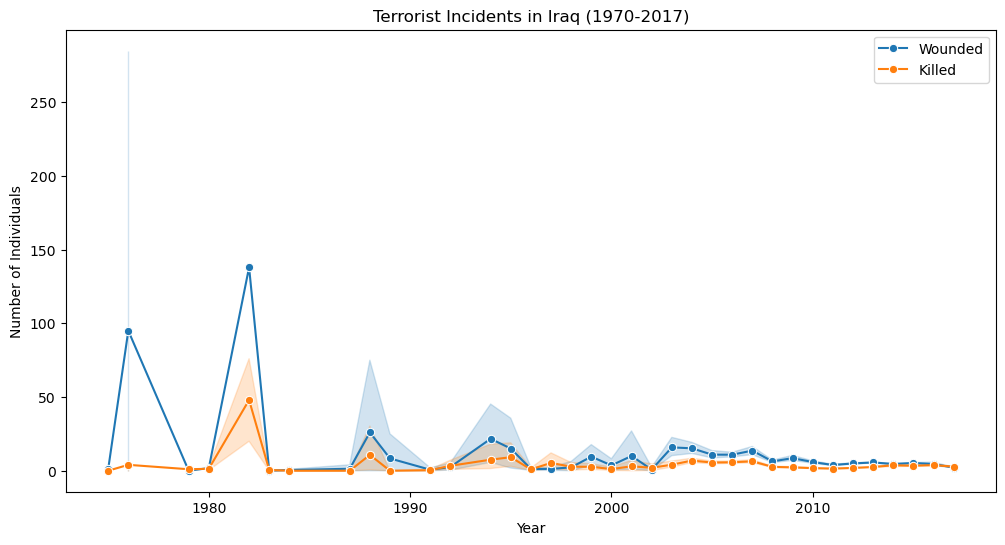

In [ ]:
selected_country = 'Iraq'
country_data = data[data['Country'] == selected_country]
print(f"Basic Statistics for {selected_country}:\n")
print(country_data.describe())
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Wounded', data=country_data, marker='o', label='Wounded')
sns.lineplot(x='Year', y='Killed', data=country_data, marker='o', label='Killed')
plt.title(f'Terrorist Incidents in {selected_country} (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Individuals')
plt.legend()
plt.show()

#### Insights for Iraq Terrorism Data:

**Temporal Trends:**

    The dataset spans from 1975 to 2017, with a peak in incidents around 2014. Notably, the majority of attacks occurred
    during the months of June and October.
**Geographical Patterns:**

    Geographically, the latitude and longitude values indicate that most incidents are concentrated in specific regions,
    with a relatively consistent pattern over the years.
**Casualties Overview:**

    The average number of killed and wounded individuals per incident is relatively low, with a notable standard deviation,
    suggesting variability in the severity of attacks.

# Terrorist Incidents in India (1970 - 2017)

Basic Statistics for India:

               Year         Month           Day      latitude     longitude  \
count  11960.000000  11960.000000  11960.000000  11801.000000  11801.000000   
mean    2006.248411      6.439047     15.624415     25.947957     82.788312   
std       10.096520      3.323835      8.778965      5.674857      7.039908   
min     1972.000000      1.000000      0.000000      8.169375     68.775724   
25%     1999.000000      4.000000      8.000000     22.585272     75.341218   
50%     2010.000000      6.000000     15.000000     25.272700     81.866144   
75%     2014.000000      9.000000     23.000000     31.147131     88.352341   
max     2017.000000     12.000000     31.000000     34.655639     96.644737   

             Killed       Wounded  
count  11740.000000  11506.000000  
mean       1.647445      2.518686  
std        4.681342     11.344047  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%    

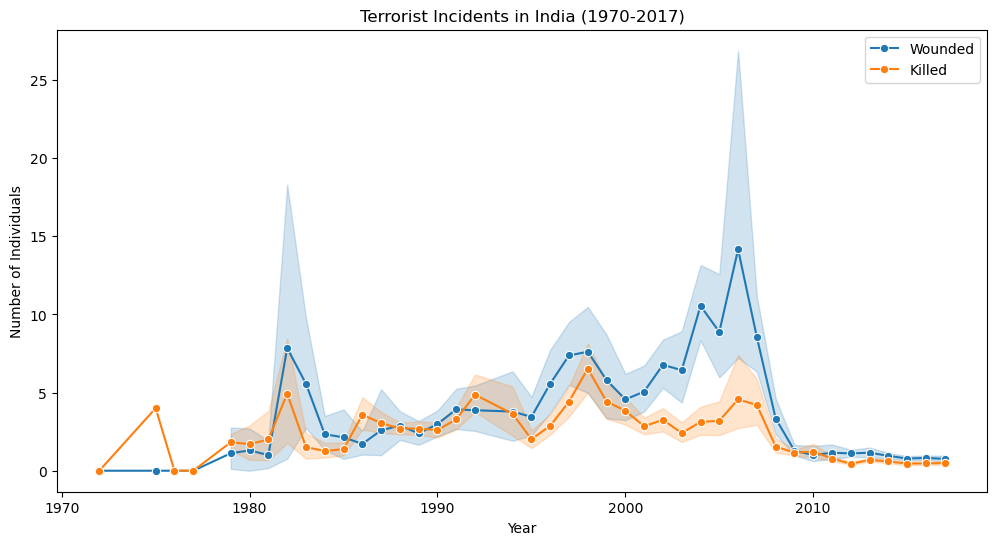

In [ ]:
selected_country = 'India'
country_data = data[data['Country'] == selected_country]
print(f"Basic Statistics for {selected_country}:\n")
print(country_data.describe())
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Wounded', data=country_data, marker='o', label='Wounded')
sns.lineplot(x='Year', y='Killed', data=country_data, marker='o', label='Killed')
plt.title(f'Terrorist Incidents in {selected_country} (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Individuals')
plt.legend()
plt.show()

#### Insights for India Terrorism Data:

**Temporal Trends:**

    The dataset spans incidents from 1972 to 2017, with a peak around 2006. Attacks are distributed across months, with a
    notable concentration in June. The majority of incidents occurred during daylight hours.
**Geographical Patterns:**

    Geographically, incidents are concentrated in specific regions, as indicated by latitude and longitude values.
    This pattern remains relatively consistent over the years.
**Casualties Overview:**

    The average number of killed individuals per incident is 1.65, with a standard deviation of 4.68, suggesting
    variability in the severity of attacks. The average number of wounded individuals is 2.52, with a notable
    standard deviation of 11.34. Some incidents resulted in higher casualties, highlighting the need for targeted
    counter-terrorism measures and emergency response capabilities.

## Conclusion
  
    This comprehensive EDA offers a holistic perspective on global terrorism, encompassing temporal, geographical, and
    causal dimensions. By incorporating in-depth analyses of Iraq and India, the study underscores the importance of
    tailoring counter-terrorism strategies to unique regional contexts. The insights derived aim to inform policymakers,
    security experts, and researchers, providing a foundation for evidence-based decisions to mitigate the impact of
    terrorism on a global scale.